In [195]:
import numpy as np
from numpy.fft import fft2,ifft2
from numpy import real
from math import exp,pi
import matplotlib.pyplot as plt

In [196]:
u=np.zeros(10000).reshape(100,100)
v=np.zeros(10000).reshape(100,100)
p=np.zeros(10000).reshape(100,100)

In [197]:
#defining the domain
dx=0.001
dy=0.001
kx=np.arange(0,100)*2*pi/(100*dx)
[Kx,Ky]=np.meshgrid(kx,kx)
k2=Kx*Kx+Ky*Ky

In [198]:
#Boundary conditions:
u[0]=np.ones(100)
u[99]=np.zeros(100)
u[:,0]=np.zeros(100)
u[:,99]=np.zeros(100)
v[0]=np.zeros(100)
v[99]=np.zeros(100)
v[:,0]=np.zeros(100)
v[:,99]=np.zeros(100)

In [199]:
#constants
nu=8.9e-04
dt=0.01

In [200]:
uk=fft2(u)
vk=fft2(v)
for i in range(0,6000):
    Ax=u*real(ifft2(1j*Kx*uk))+v*real(ifft2(1j*Ky*uk))
    Ay=u*real(ifft2(1j*Kx*vk))+v*real(ifft2(1j*Ky*vk))

    Cxk=fft2(Ax)-(Kx/k2)*fft2(Ax)*Kx
    Cxk[0,0]=0
    Cyk=fft2(Ay)-(Ky/k2)*fft2(Ax)*Kx
    Cyk[0,0]=0

    uk=uk-(Cxk+nu*k2*uk)*dt
    vk=vk-(Cyk+nu*k2*vk)*dt
    u=real(ifft2(uk))
    v=real(ifft2(vk))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in add
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


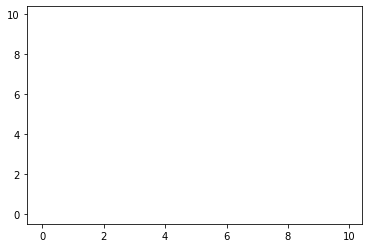

In [201]:
x=np.arange(0,10,0.1)
[X,Y]=np.meshgrid(x,x)
plt.quiver(X,Y,u,v)